# CNN Arabic Handwritten Characters Recognition

## Implementation

### Libs

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

### Load & Prepare Data

In [2]:
def get_and_prepare_data():
    # Charger les données
    X_train = pd.read_csv("arabic characteres/csvTrainImages 13440x1024.csv").values
    Y_train = pd.read_csv("arabic characteres/csvTrainLabel 13440x1.csv").values
    X_test = pd.read_csv("arabic characteres/csvTestImages 3360x1024.csv").values
    Y_test = pd.read_csv("arabic characteres/csvTestLabel 3360x1.csv").values

    # Reshape des données en (32, 32, 1) pour correspondre à l'entrée du modèle
    X_train = X_train.reshape(-1, 32, 32, 1).astype('float32')
    X_test = X_test.reshape(-1, 32, 32, 1).astype('float32')

    # Normaliser les données entre 0 et 1
    X_train /= 255.0
    X_test /= 255.0

    # Encodage one-hot pour les étiquettes
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    
    return (X_train, Y_train), (X_test, Y_test)

(X_train, y_train), (X_test, y_test) = get_and_prepare_data()

### Define Model Architecture - CNN (layers, activation functions, loss function, optimizer) and Train

# optimizers

In [8]:
def large_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(29, activation='softmax'))  # Modifier la sortie pour correspondre à 29 classes

    # Compile model avec l'optimiseur passé en argument
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [9]:
from tensorflow.keras.optimizers import RMSprop, Adam

# Entraînement avec Adam
model_adam = large_model(optimizer=Adam(learning_rate=0.001))
history_adam = model_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Entraînement avec RMSprop
model_rmsprop = large_model(optimizer=RMSprop(learning_rate=0.001))
history_rmsprop = model_rmsprop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.2503 - loss: 2.6037 - val_accuracy: 0.6436 - val_loss: 1.1043
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.6922 - loss: 0.9604 - val_accuracy: 0.7895 - val_loss: 0.6738
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.8348 - loss: 0.5292 - val_accuracy: 0.8508 - val_loss: 0.4920
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.8750 - loss: 0.3870 - val_accuracy: 0.8541 - val_loss: 0.4612
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.9080 - loss: 0.2791 - val_accuracy: 0.8824 - val_loss: 0.3802
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.9333 - loss: 0.2147 - val_accuracy: 0.8934 - val_loss: 0.3654
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.9438 - loss: 0.1831 - val_accuracy: 0.8988 - val_loss: 0.3554
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.9638 - loss: 0.1188 - val_accu

<h3>Comparaison des résultats 

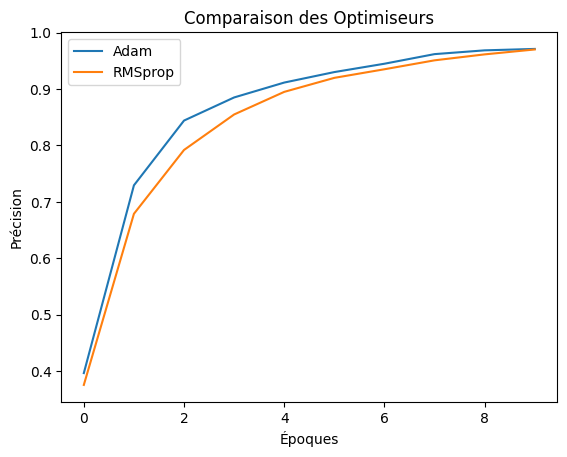

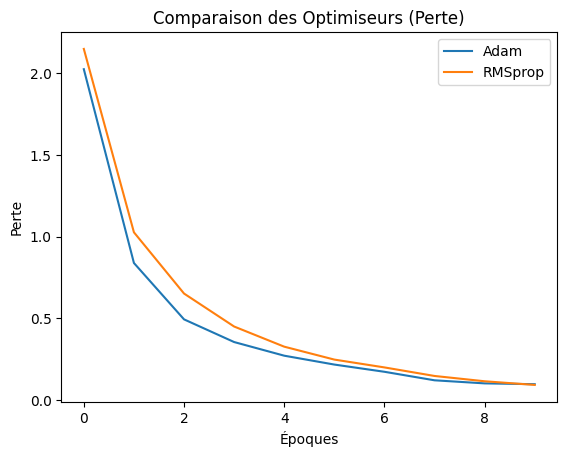

In [10]:

import matplotlib.pyplot as plt

# Comparer les courbes de précision
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop')
plt.title('Comparaison des Optimiseurs')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Comparer les courbes de perte
plt.plot(history_adam.history['loss'], label='Adam')
plt.plot(history_rmsprop.history['loss'], label='RMSprop')
plt.title('Comparaison des Optimiseurs (Perte)')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


<h3>Nesterov 

C:\Users\intel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.0521 - loss: 3.4182 - val_accuracy: 0.1417 - val_loss: 3.0206
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.1821 - loss: 2.8962 - val_accuracy: 0.2578 - val_loss: 2.5018
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.3118 - loss: 2.3742 - val_accuracy: 0.3769 - val_loss: 2.0792
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.4113 - loss: 2.0004 - val_accuracy: 0.4623 - val_loss: 1.8009
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.4811 - loss: 1.7504 - val_accuracy: 0.5106 - val_loss: 1.6110
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.5322 - loss: 1.5686 - val_accuracy: 0.5323 - val_loss: 1.4930
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.5797 - loss: 1.3997 - val_accuracy: 0.5740 - val_loss: 1.3562
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.6216 - loss: 1.2632 - val_accu

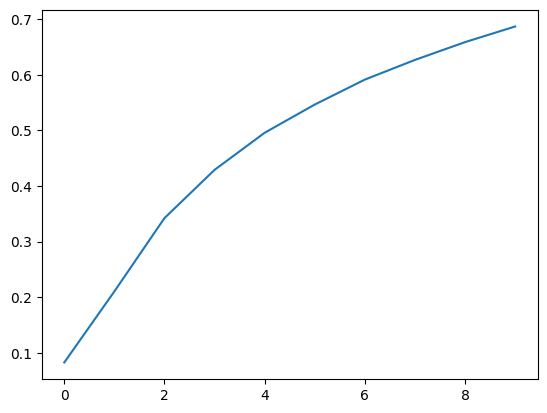

In [19]:
from tensorflow.keras.optimizers import SGD

# Entraînement avec Nesterov
model_nesterov = large_model(optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True))
history_nesterov = model_nesterov.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Ajouter à la comparaison des courbes
plt.plot(history_nesterov.history['accuracy'], label='Nesterov')


In [20]:
model_adam.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         160,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 29)                  │           2,929 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,321 (2.50 MB)

 Trainable params: 218,773 (854.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,548 (1.67 MB)

In [11]:
# evaluate model
_ , acc = model_adam.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 91.009


### Visualize Model Performance in Training (Train, Validation)

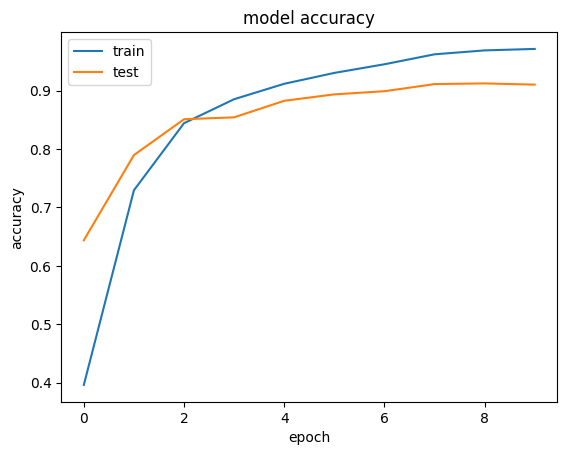

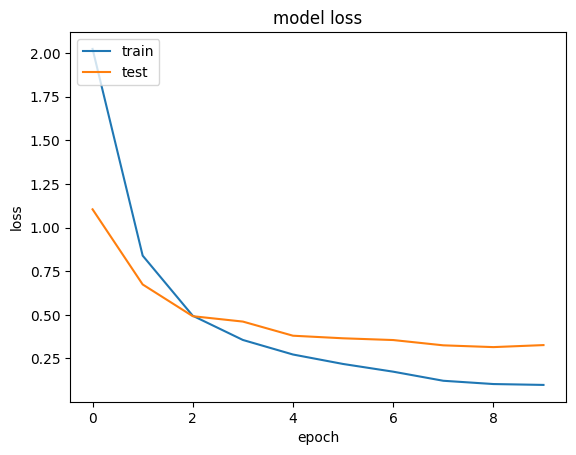

In [12]:
import matplotlib.pyplot as plt
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Verify

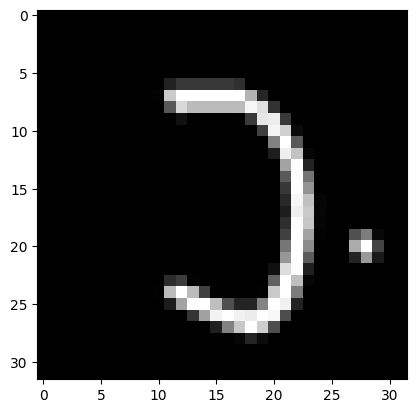

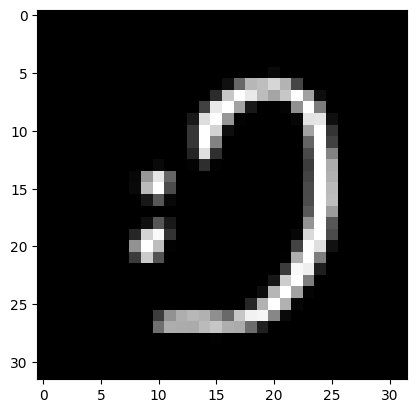

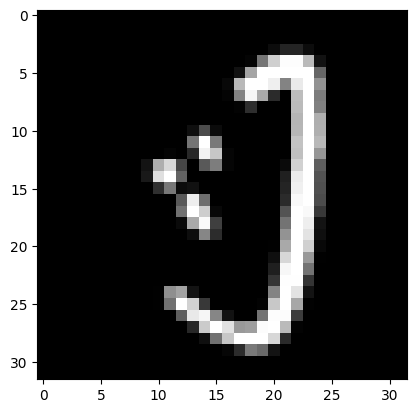

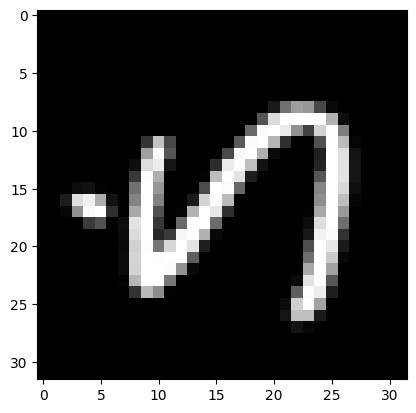

In [13]:
import matplotlib.pyplot as plt

# A few random samples
use_samples = [8, 18, 24, 50]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
    # Reshape the image to 32x32 for plotting
    reshaped_image = X_train[sample].reshape((32, 32))
    plt.imshow(reshaped_image, cmap='gray')
    plt.show()
    
    # Add sample to array for prediction (keeping the original shape)
    samples_to_predict.append(X_train[sample])


In [14]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(4, 32, 32, 1)


In [16]:
# Generate predictions for samples
predictions = model_adam.predict(samples_to_predict)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
[[2.89682422e-17 2.17697239e-19 9.99887586e-01 8.77437678e-10
  1.51428092e-10 3.35321505e-18 4.83051099e-13 1.72970759e-16
  2.55802619e-11 2.63952597e-13 2.39502428e-13 2.14300421e-16
  8.64824233e-06 1.07944587e-09 1.99861058e-10 2.86249410e-11
  3.97540142e-14 5.73905276e-14 5.08860536e-17 2.03358069e-17
  1.44662067e-06 1.07063771e-08 4.68448803e-07 3.33736914e-08
  6.86333490e-11 1.01737343e-04 4.29132370e-14 5.47072428e-16
  3.00270031e-08]
 [2.02593903e-18 4.83998684e-21 7.67012065e-10 9.98870671e-01
  1.10501691e-03 4.31751801e-10 3.30825287e-07 2.07496768e-07
  6.89221477e-15 1.54885345e-14 6.74396411e-13 3.02624744e-12
  8.57119212e-14 3.67752426e-11 5.16500151e-16 2.38872977e-10
  1.42241009e-20 2.32710335e-12 2.24837596e-12 6.13646436e-14
  1.54031527e-11 9.79502417e-08 1.00670028e-09 2.38505907e-15
  1.00917729e-15 2.35559874e-05 1.04539081e-15 1.03268038e-14
  1.05043425e-10]
 [2.08105511e-19 1.03596098e-22 1.65801456e-10 4.73610453

In [17]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[2 3 4 7]


In [18]:
# Dictionnaire de correspondance (exemple) entre les indices et les caractères arabes
# Dictionnaire de correspondance entre les indices et les caractères arabes (commence avec 1)
index_to_char = {
    1: 'ا', 2: 'ب', 3: 'ت', 4: 'ث', 5: 'ج', 6: 'ح', 7: 'خ', 
    8: 'د', 9: 'ذ', 10: 'ر', 11: 'ز', 12: 'س', 13: 'ش', 14: 'ص', 
    15: 'ض', 16: 'ط', 17: 'ظ', 18: 'ع', 19: 'غ', 20: 'ف', 
    21: 'ق', 22: 'ك', 23: 'ل', 24: 'م', 25: 'ن', 26: 'ه', 
    27: 'و', 28: 'ي'
}


# Affichage des prédictions sous forme de caractères
print("Prédictions en indices:", classes)
predicted_chars = [index_to_char[i] for i in classes]
print("Prédictions en caractères:", predicted_chars)

Prédictions en indices: [2 3 4 7]
Prédictions en caractères: ['ب', 'ت', 'ث', 'خ']
